# Data Generation

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [2]:
'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
theta_pred = la.inv(A.T @ A) @ (A.T @ y_data)

print('Empirical theta', theta_pred.reshape(-1))
print("Difference:", (theta_pred - theta_true).reshape(-1))

Empirical theta [1.00147251 1.00937701 1.00102332 0.99426372 0.99154341 0.99881132
 0.99655714 0.99402278 0.99758949 1.01004787]
Difference: [ 0.00147251  0.00937701  0.00102332 -0.00573628 -0.00845659 -0.00118868
 -0.00344286 -0.00597722 -0.00241051  0.01004787]


# SGD Variants Noisy Function

In [3]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [4]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        
        #print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.

        import numpy as np
        '''
        grad = deg_ * np.abs(err)**(deg_ - 1) * np.sign(err) * x_
        l = np.power(abs(err), deg_)
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

# Running SGD Variants

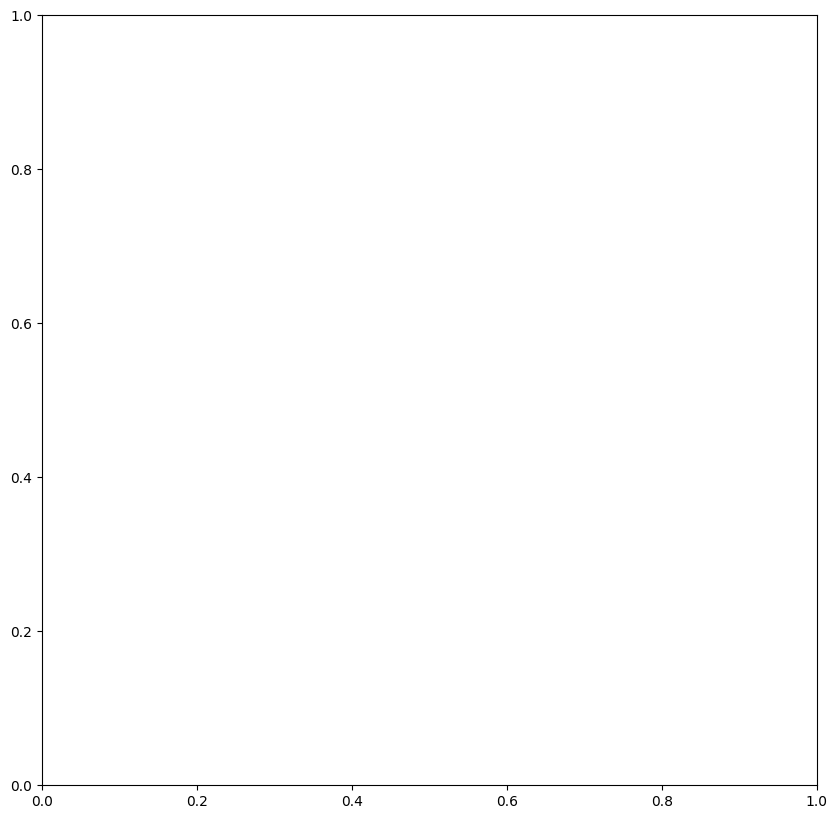

In [5]:
#@title Parameters
deg_ = 2. #@param {type: "number"}
num_rep = 10 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

theta init: [0.0558896  0.02833132 0.09611366 0.06175059 0.06358052 0.00488876
 0.0604229  0.03903461 0.09793825 0.02414114]
adam 0
adam done
Method: adam, Final Theta: [0.3584979025175881, 0.33329132475439416, 0.32933998468223685, 0.316191145280206, 0.3958514887634333, 0.25872889388485076, 0.32700039617631277, 0.33531261103158505, 0.3818463838016675, 0.2771705531219258]
Method: adam, Difference from true theta: [-0.6415021  -0.66670868 -0.67066002 -0.68380885 -0.60414851 -0.74127111
 -0.6729996  -0.66468739 -0.61815362 -0.72282945]
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
sgd 0
sgd done
Method: sgd, Final Theta: [0.4418485548951035, 0.57139123031354, 0.5292910455535137, 0.4960316150479203, 0.5452732510542394, 0.5027056100268192, 0.4138183074237376, 0.5017751407000246, 0.6029630507408456, 0.4540890514828328]
Method: sgd, Di

Text(0.5, 0, 'Updates')

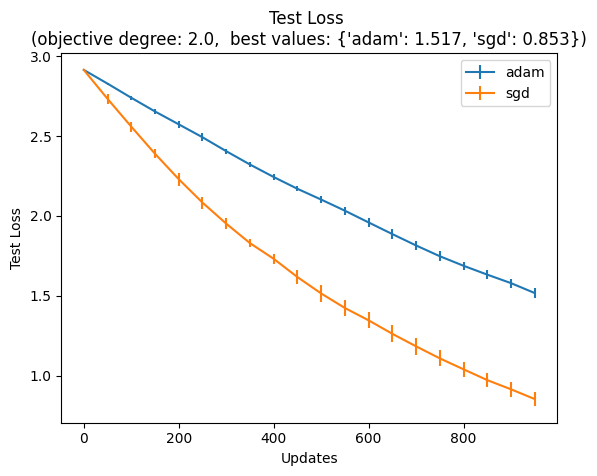

In [6]:
print("theta init:", theta_init.reshape(-1))

for method_idx, method in enumerate(['adam', 'sgd']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
            #print('Adam Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = np.zeros_like(theta_init) # TODO: Initialize parameters
            v = np.zeros_like(theta_init)
            epsilon = 1e-8

        if method == 'adagrad':
            #print('Adagrad Not implemented.')
            epsilon = 1e-8 # TODO: Initialize parameters
            squared_sum = np.zeros_like(theta_init) # Initialize squared_sum
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)
            
            if method == 'adam':
                #print('Adam Not implemented.') # TODO: Implement Adam
                m = beta_1 * m + (1 - beta_1) * gradient
                v = beta_2 * v + (1 - beta_2) * gradient**2
                m_hat = m / (1 - beta_1**(t + 1))
                v_hat = v / (1 - beta_2**(t + 1))
                theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + epsilon)
            elif method == 'adagrad':
                #print('Adagrad Not implemented.')
                epsilon = np.random.uniform(0, 0.1, data_num) # Initialize parameters
                squared_sum = squared_sum + gradient**2
                theta_hat = theta_hat - lr * gradient / (np.sqrt(squared_sum) + epsilon) # Implement Adagrad
            
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        
    
    print(method, 'done')

    print(f"Method: {method}, Final Theta: {theta_hat.reshape(-1).tolist()}")
    print(f"Method: {method}, Difference from true theta: {(theta_hat - theta_true).reshape(-1)}")

    
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)
    
    #print('Not implemented.')
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0) # TODO: Calculate the mean test loss

    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0 
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np, axis=0) / np.sqrt(num_rep) # TODO: Calculate the standard error for test loss

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')

0.4 0
0.4 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 0.4
test_loss_mean: [1.03869743 1.03578937 1.03276377 1.03083059 1.02850101 1.02617104
 1.02419572 1.02295739 1.02210433 1.02197484 1.02092818 1.01949866
 1.01779059 1.01666551 1.01561149 1.01403818 1.01275841 1.01085309
 1.00973403 1.00941463]
Minimum 1.0094146321323096
0.4 0
0.4 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 0.4
test_loss_mean: [1.03869743 1.03760818 1.0366777  1.0355582  1.03495732 1.03375287
 1.03258071 1.03080981 1.02937991 1.02921169 1.02800905 1.02750095
 1.02699317 1.02652531 1.02563322 1.0252824  1.02395399 1.02309611
 1.02228819 1.02199424]
Minimum 1.0219942395714434


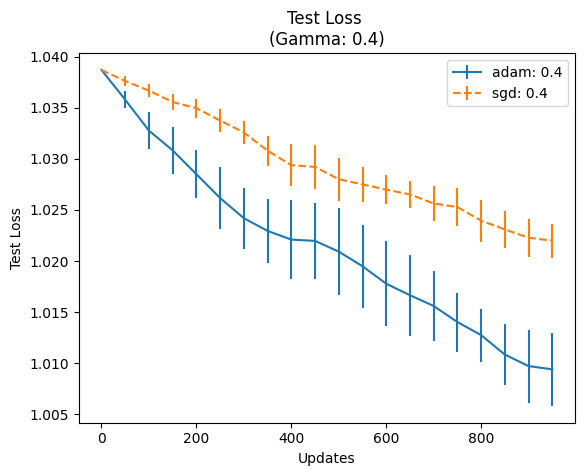

0.7 0
0.7 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 0.7
test_loss_mean: [1.15995441 1.15271429 1.14502274 1.13797758 1.13022561 1.12175136
 1.11336177 1.10546445 1.09785218 1.09008097 1.08195307 1.07310973
 1.06665337 1.05987733 1.052246   1.04402705 1.03646508 1.02912474
 1.02218257 1.01458876]
Minimum 1.014588756902431
0.7 0
0.7 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 0.7
test_loss_mean: [1.15995441 1.1562195  1.15269388 1.14923152 1.14525541 1.14184993
 1.13772316 1.13393928 1.12982977 1.12592245 1.12226905 1.11829406
 1.11474919 1.11116989 1.10731287 1.10344576 1.09967584 1.09603671
 1.09207879 1.08828941]
Minimum 1.0882894101062626


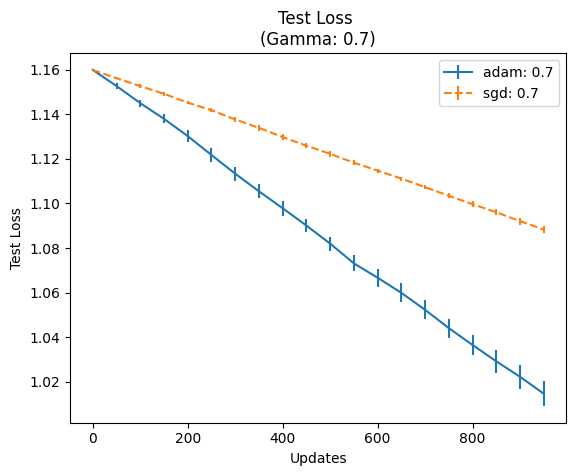

1 0
1 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 1
test_loss_mean: [1.35776903 1.33887168 1.32146716 1.30334484 1.28552631 1.26846687
 1.24973166 1.23033521 1.21243078 1.19493108 1.17828889 1.16020404
 1.14306572 1.1251967  1.10727116 1.08950654 1.07161086 1.05309661
 1.03614763 1.01882415]
Minimum 1.018824153208835
1 0
1 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 1
test_loss_mean: [1.35776903 1.34776704 1.33835243 1.32906976 1.31871922 1.30803955
 1.29736116 1.28650033 1.27636318 1.26566255 1.25522884 1.2449909
 1.2345995  1.22453075 1.21373411 1.20353924 1.19338911 1.183357
 1.17343985 1.16376995]
Minimum 1.1637699473469127


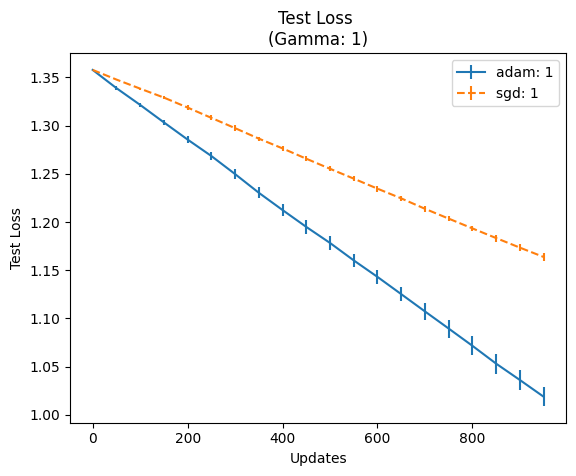

2 0
2 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 2
test_loss_mean: [2.91371594 2.82389814 2.72785651 2.63809527 2.55097497 2.47475974
 2.39222205 2.3079274  2.22884482 2.15990375 2.08663448 2.01912919
 1.94842018 1.87760082 1.81619791 1.75059114 1.68888079 1.63044658
 1.57087212 1.51021084]
Minimum 1.5102108408695256
2 0
2 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 2
test_loss_mean: [2.91371594 2.74462835 2.57980162 2.41276046 2.27915279 2.1399288
 1.99058658 1.86401412 1.74711676 1.6278365  1.51404976 1.41853559
 1.32492593 1.2402815  1.16739991 1.09617482 1.03120496 0.97347976
 0.91973652 0.86077641]
Minimum 0.8607764094631054


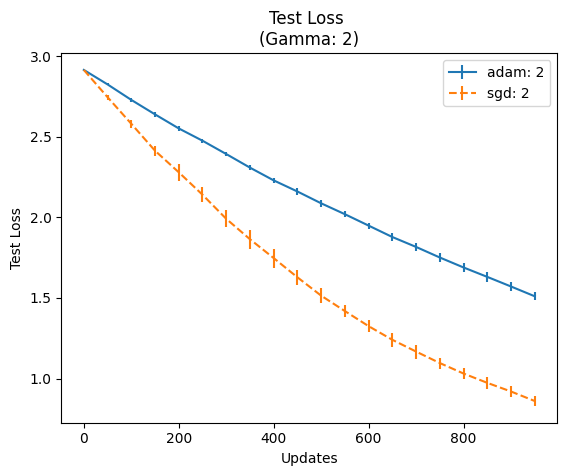

3 0
3 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 3
test_loss_mean: [8.00354179 7.66481641 7.36111207 7.03200694 6.71607824 6.45706235
 6.16515102 5.93805763 5.6680959  5.4594171  5.24094127 5.03505395
 4.82675783 4.63733128 4.44980681 4.27398631 4.07563566 3.90311817
 3.74783985 3.58707124]
Minimum 3.587071241829473
3 0
3 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 3
test_loss_mean: [8.00354179 5.43126426 3.96120709 2.91929192 2.21701869 1.74629504
 1.39195605 1.11290606 0.91204316 0.75733328 0.64968711 0.55002632
 0.47609561 0.40064834 0.344829   0.30077791 0.26551514 0.23615038
 0.21022309 0.1886963 ]
Minimum 0.18869630101868345


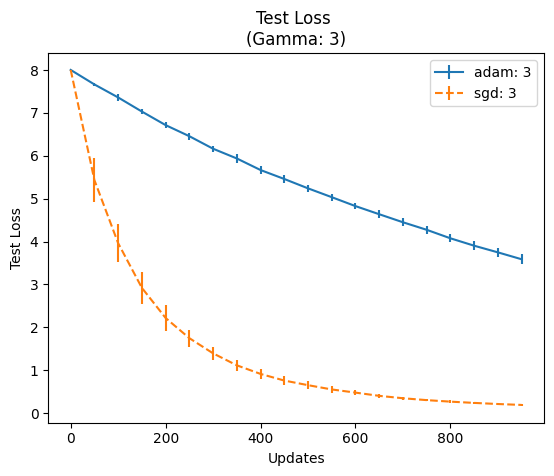

5 0
5 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 5
test_loss_mean: [90.04005338 84.98953198 79.78470613 75.66654059 72.086482   68.57376998
 64.82963709 61.44891242 58.75703388 56.23867351 53.53637813 51.00796333
 47.93214241 45.45757428 43.65059947 41.43935245 39.40845233 37.69888648
 36.09263267 34.43917433]
Minimum 34.43917432682555
5 0
5 done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
gamma: 5
test_loss_mean: [9.00400534e+01 5.93572929e+00 9.18048250e-01 4.45558066e-01
 2.85793646e-01 2.10754627e-01 1.60599209e-01 1.34817217e-01
 1.11034293e-01 9.70910437e-02 8.12062849e-02 7.15637312e-02
 6.42849852e-02 5.78587919e-02 5.04476049e-02 4.29732178e-02
 

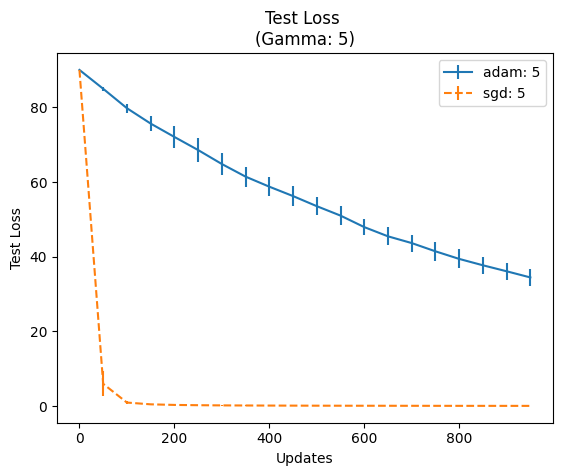

Best values: {'adam: 0.4': np.float64(1.0094146321323096), 'sgd: 0.4': np.float64(1.0219942395714434), 'adam: 0.7': np.float64(1.014588756902431), 'sgd: 0.7': np.float64(1.0882894101062626), 'adam: 1': np.float64(1.018824153208835), 'sgd: 1': np.float64(1.1637699473469127), 'adam: 2': np.float64(1.5102108408695256), 'sgd: 2': np.float64(0.8607764094631054), 'adam: 3': np.float64(3.587071241829473), 'sgd: 3': np.float64(0.18869630101868345), 'adam: 5': np.float64(34.43917432682555), 'sgd: 5': np.float64(0.029258999346773014)}
Best values: {'adam: 0.4': 1.009, 'sgd: 0.4': 1.021, 'adam: 0.7': 1.014, 'sgd: 0.7': 1.088, 'adam: 1': 1.018, 'sgd: 1': 1.163, 'adam: 2': 1.51, 'sgd: 2': 0.86, 'adam: 3': 3.587, 'sgd: 3': 0.188, 'adam: 5': 34.439, 'sgd: 5': 0.029}


In [17]:
best_vals = {}
gammas = [0.4, 0.7, 1, 2, 3, 5]
#
for gamma_idx, gamma in enumerate(gammas):
    for method_idx, method in enumerate(['adam', 'sgd']):
        test_loss_mat = []
        train_loss_mat = []
        
        for replicate in range(num_rep):
            if replicate % 20 == 0:
                print(gamma, replicate)
                
            beta_1 = 0.9
            beta_2 = 0.999
            m = np.zeros_like(theta_init) # TODO: Initialize parameters
            v = np.zeros_like(theta_init)
            epsilon = 1e-8
                
            theta_hat = theta_init.copy()
            test_loss_list = []
            train_loss_list = []

            for t in range(max_iter):
                idx = np.random.choice(data_num, batch_size) # Split data
                train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=gamma)
                artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
                gradient = gradient + artificial_grad_noise
                train_loss_list.append(train_loss)
                
                if t % test_exp_interval == 0:
                    test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=gamma)
                    test_loss_list.append(abs(test_loss))
                
                if method == 'adam':
                    #print('Adam Not implemented.') # TODO: Implement Adam
                    m = beta_1 * m + (1 - beta_1) * gradient
                    v = beta_2 * v + (1 - beta_2) * gradient**2
                    m_hat = m / (1 - beta_1**(t + 1))
                    v_hat = v / (1 - beta_2**(t + 1))
                    theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + epsilon)

                elif method == 'sgd':
                    theta_hat = theta_hat - lr * gradient

            test_loss_mat.append(test_loss_list)
            train_loss_mat.append(train_loss_list)
            
        
        print(gamma, 'done')

        x_axis = np.arange(max_iter)[::test_exp_interval]
        
        print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
        print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
        test_loss_np = np.array(test_loss_mat)
        
        #print('Not implemented.')
        '''
        Hints:
        1. Use test_loss_np in np.mean() with axis = 0
        '''
        test_loss_mean = np.mean(test_loss_np, axis=0) # TODO: Calculate the mean test loss

        '''
        Hints:
        1. Use test_loss_np in np.std() with axis = 0 
        2. Divide by np.sqrt() using num_rep as a parameter
        '''
        test_loss_se = np.std(test_loss_np, axis=0) / np.sqrt(num_rep) # TODO: Calculate the standard error for test loss

        fmt = ""

        if method == "sgd":
            fmt = "--"

        plt.errorbar(x_axis, test_loss_mean, fmt=fmt, yerr=2.5*test_loss_se, label=f"{method}: {gamma}")
        print('gamma:', gamma)
        print('test_loss_mean:', test_loss_mean)
        best_vals[f"{method}: {gamma}"] = min(test_loss_mean)
        print("Minimum", min(test_loss_mean))
    plt.title(f'Test Loss \n(Gamma: {gamma})')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.xlabel('Updates')
    plt.show()

print('Best values:', best_vals)

best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
print('Best values:', best_vals)
plt.show()